In [0]:
# Loading Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline 

# Loading and Selecting Data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['Spain', 'France','Portugal','Germany','Italy', 'United Kingdom']
df = df[df['Country'].isin(countries)]

# Creating a Summary Column of all cases
#df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)


In [14]:
# Explore data
df.tail(5)

,Date,Country,Confirmed,Recovered,Deaths,Cases
22250,2020-05-19,Germany,177778,155681,8081,341540
22269,2020-05-19,Italy,226699,129401,32169,388269
22321,2020-05-19,Portugal,29432,6431,1247,37110
22342,2020-05-19,Spain,232037,0,27778,259815
22362,2020-05-19,United Kingdom,250138,1099,35422,286659


In [0]:
# Restructuring Data
df = df.pivot(index='Date', columns='Country', values='Confirmed')
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries

# Calculating Rates per 100,000
populations = {'Spain':46754778 , 'France': 65239883, 'Portugal': 10726963, 'Germany': 83721496 , 'Italy': 61208911 , 'United Kingdom': 67802690}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000

Text(2020-01-23 00:00:00, 260138, 'Fuente: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

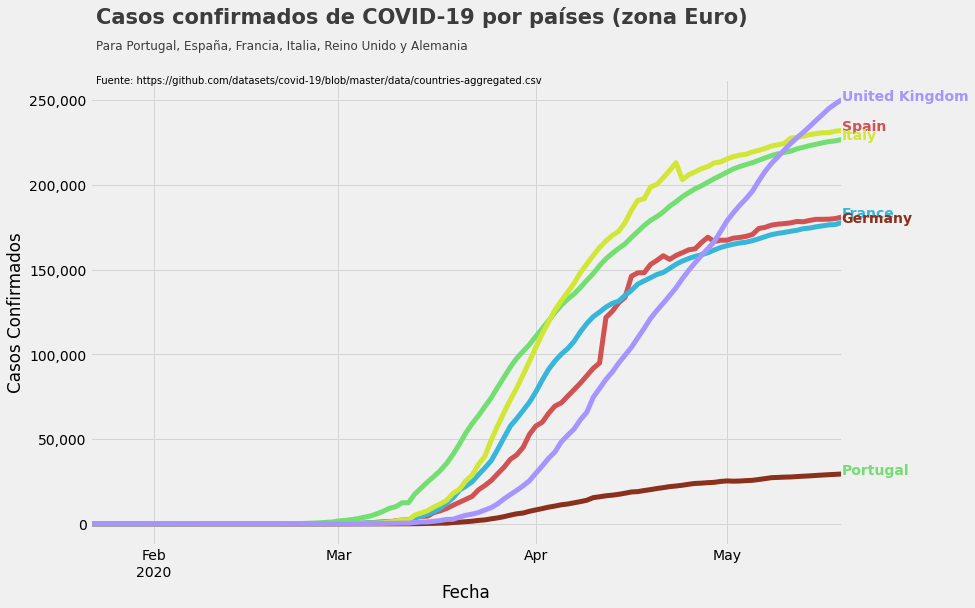

In [51]:
# Setting countries colours and style
colors = {'Spain':'#d15252', 'France':'#38b6d9', 'Portugal':'#73de71', 'Germany':'#8a301c', 'Italy':'#d1e635', 'United Kingdom':'#a694ff'}
plt.style.use('fivethirtyeight')

# Visualization
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Fecha')
plot.set_ylabel('Casos Confirmados')

for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# Adding Title, labels and references
plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "Casos confirmados de COVID-19 por países (zona Euro)", fontsize = 21, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+30000, s = "Para Portugal, España, Francia, Italia, Reino Unido y Alemania", fontsize = 12, alpha = 0.75)
plot.text(x = percapita.index[1], y = int(covid.max().max())+10000,s = 'Fuente: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)   

Text(2020-01-23 00:00:00, 436.2851069467168, 'Fuente: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

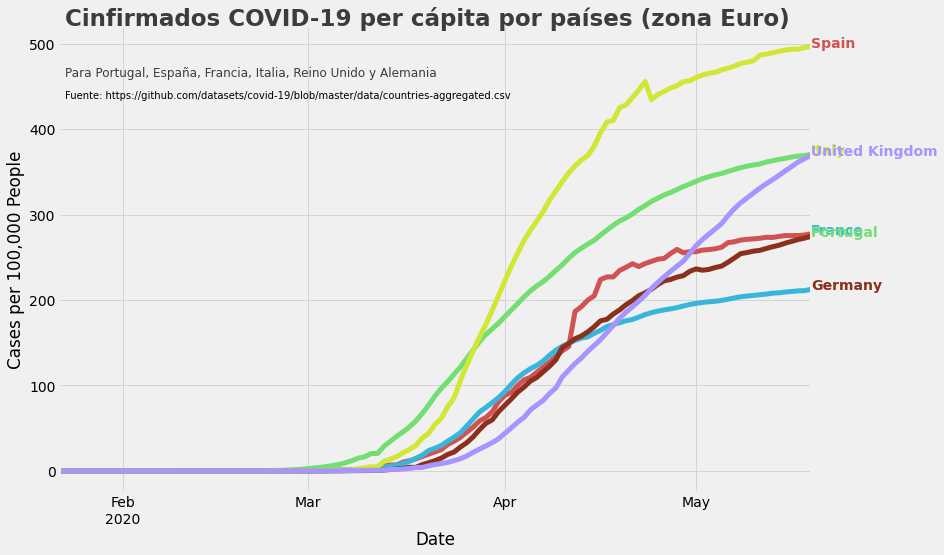

In [40]:
percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Fecha')
percapitaplot.set_ylabel('Cases per 100,000 People')

for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')
    
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+25, s = "Cinfirmados COVID-19 per cápita por países (zona Euro)", fontsize = 23, weight = 'bold', alpha = .75)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()-35, s = "Para Portugal, España, Francia, Italia, Reino Unido y Alemania", fontsize = 12, alpha = .75)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()-60,s = 'Fuente: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)